<a href="https://colab.research.google.com/github/l3t022/Clase_Analitica/blob/main/colab/Rent_a_used_car_Complete_version_(v1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabajo Final - Prediccion del precio de vehiculos usados en USA**

## **Objetivo**

Crear un modelo de regresion que pueda predecir el precio de un automovil usado,, independiente del fabricante, con cilindraje estandar y de uso personal en las ciudades de USA.

## Carga de librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Descripcion del conjunto de datos y carga**

Se utilizó un conjunto de datos de automóviles usados, que muestra un listado de vehículos en USA, cuya información es gestionada en la Web de Craigslist.org -
La Base de Datos original fue obtenida en [Kaggle](https://www.kaggle.com/austinreese/craigslist-carstrucks-data), y fue limpiada / depurada para dicho trabajo.

La variable objetivo es el precio del auto y el conjunto de datos posee 22 variables adicionales:

- **index:** indice de la Base de Datos.
- **price:** precio del automovil.
- **year:** año de fabricación.
- **manufacturer:** nombre del fabricante.
- **model:** modelo del auto.
- **nummodel:** codificación de la variable *model* durante su preparación.
- **cylinders:** cilindraje del auto.
- **numcylinders:** codificación de la variable *cylinders* durante su preparación
- **odometer:** número de millas recorridas.
- **title_status:** grado o estatus de propiedad del bien.
- **numtitle_status:** codificación de la variable *title_status* durante su preparación.
- **transmission:** tipo de transmisión del automovil (automatica, mecanica, otro).
- **numtransmission:** codificación de la variable *transmission* durante su preparación
- **drive:** tipo de tracción del carro (trasera, delantera, etc.)
- **numdrive:** codificación de la variable *drive* durante su preparación
- **size:** tamaño del auto  (compacto, mediano, grande).
- **numsize:** codificación de la variable *size* durante su preparación
- **type:** tipo de automovil.
- **numtype:** codificación de la variable *type* durante su preparación
- **paint_color:** color del auto.
- **numpaint_color:** codificación de la variable *paint_color* durante su preparación
- **state:** nombre del Estado en USA.
- **numstate:** codificación de la variable *cylinders* durante su preparación

## Ruta de acceso - Archivo

In [ ]:
url = "https://raw.githubusercontent.com/l3t022/Clase_Analitica/main/csv/"

In [ ]:
archivo = "vehicles1.csv"

## Creación del DataFrame

In [ ]:
PredCar = pd.read_csv(url+archivo)

## Información del DataFrame

In [ ]:
PredCar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84247 entries, 0 to 84246
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            84247 non-null  int64  
 1   price         84247 non-null  int64  
 2   year          84247 non-null  float64
 3   manufacturer  81014 non-null  object 
 4   model         83634 non-null  object 
 5   condition     84247 non-null  object 
 6   cylinders     81113 non-null  object 
 7   fuel          84247 non-null  object 
 8   odometer      84247 non-null  float64
 9   title_status  84247 non-null  object 
 10  transmission  84234 non-null  object 
 11  drive         80160 non-null  object 
 12  size          84247 non-null  object 
 13  type          81709 non-null  object 
 14  paint_color   81038 non-null  object 
 15  state         84247 non-null  object 
 16  posting_date  84247 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 10.9+ MB


## Eliminar duplicados

In [ ]:
PredCar.drop_duplicates(inplace=True) 

## Convertir de float64 a int64

In [ ]:
PredCar['year'] = PredCar['year'].astype(int) 

## Convertir de object a fecha

In [ ]:
PredCar['posting_date'] = pd.to_datetime(PredCar['posting_date'], utc=True) 

## Información del DataFrame

In [ ]:
PredCar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84247 entries, 0 to 84246
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id            84247 non-null  int64              
 1   price         84247 non-null  int64              
 2   year          84247 non-null  int32              
 3   manufacturer  81014 non-null  object             
 4   model         83634 non-null  object             
 5   condition     84247 non-null  object             
 6   cylinders     81113 non-null  object             
 7   fuel          84247 non-null  object             
 8   odometer      84247 non-null  float64            
 9   title_status  84247 non-null  object             
 10  transmission  84234 non-null  object             
 11  drive         80160 non-null  object             
 12  size          84247 non-null  object             
 13  type          81709 non-null  object             
 14  paint_

## Devuelve valores únicos 

In [ ]:
PredCar.year.unique()

array([2013, 2011, 2004, 2012, 2001, 2017, 2003, 2008, 2005, 2018, 2019,
       2006, 2014, 2009, 2002, 2016, 2007, 2015, 2010, 2020])

In [ ]:
PredCar.posting_date.unique()

<DatetimeArray>
['2021-05-03 19:02:03+00:00', '2021-04-30 21:35:11+00:00',
 '2021-04-29 22:19:18+00:00', '2021-04-27 17:20:01+00:00',
 '2021-04-26 16:15:36+00:00', '2021-04-24 23:39:59+00:00',
 '2021-04-22 00:26:56+00:00', '2021-04-16 15:40:58+00:00',
 '2021-04-13 22:05:44+00:00', '2021-04-13 16:20:25+00:00',
 ...
 '2021-04-07 20:42:53+00:00', '2021-04-07 20:42:54+00:00',
 '2021-04-07 20:42:51+00:00', '2021-04-07 20:42:50+00:00',
 '2021-04-07 20:18:57+00:00', '2021-04-07 17:58:09+00:00',
 '2021-04-07 15:06:54+00:00', '2021-04-07 15:03:17+00:00',
 '2021-04-07 03:04:03+00:00', '2021-04-05 21:18:42+00:00']
Length: 79328, dtype: datetime64[ns, UTC]

## Eliminación de columnas 

In [ ]:
PredCar = PredCar.drop(columns=["id", "posting_date","fuel","condition"])
PredCar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84247 entries, 0 to 84246
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         84247 non-null  int64  
 1   year          84247 non-null  int32  
 2   manufacturer  81014 non-null  object 
 3   model         83634 non-null  object 
 4   cylinders     81113 non-null  object 
 5   odometer      84247 non-null  float64
 6   title_status  84247 non-null  object 
 7   transmission  84234 non-null  object 
 8   drive         80160 non-null  object 
 9   size          84247 non-null  object 
 10  type          81709 non-null  object 
 11  paint_color   81038 non-null  object 
 12  state         84247 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(10)
memory usage: 8.7+ MB


## Se eliminan valores de "year" > 2019

In [ ]:
PredCar=PredCar[PredCar.year < 2020] 
PredCar.year.unique()

array([2013, 2011, 2004, 2012, 2001, 2017, 2003, 2008, 2005, 2018, 2019,
       2006, 2014, 2009, 2002, 2016, 2007, 2015, 2010])

# Se eliminan valores de "price" < 950

In [ ]:
PredCar=PredCar[PredCar.price > 950] 
PredCar.price.unique()

array([15000, 19900, 14000, ..., 11589,  3670, 27294], dtype=int64)

## Tamaño de la columna price respecto a los precios <30000 

In [ ]:
PredCar[PredCar.price < 30000].shape

(69455, 13)

## Tamaño de la columna price respecto a los precios >950 

In [ ]:
PredCar[PredCar.price > 950].shape

(77151, 13)

In [ ]:
PredCar=PredCar[(PredCar.price < 30000) & (PredCar.price > 950 )]
PredCar.shape

(69455, 13)

## Tamaño de la columna odometer <1000  

In [ ]:
PredCar[PredCar.odometer < 1000].shape

(570, 13)

## Tamaño de la columna odometer >300000 

In [ ]:
PredCar[PredCar.odometer > 300000].shape

(541, 13)

In [ ]:
PredCar=PredCar[(PredCar.odometer < 300000) & (PredCar.odometer >= 1000 )]
PredCar.shape

(68301, 13)

## Descripción de variables de tipo categoricas 

In [ ]:
PredCar.select_dtypes(include=['object']).describe()

,manufacturer,model,cylinders,title_status,transmission,drive,size,type,paint_color,state
count,65989,67825,65840,68301,68293,64951,68301,66310,65771,68301
unique,38,8536,8,6,3,3,4,13,12,51
top,ford,f-150,4 cylinders,clean,automatic,fwd,full-size,sedan,white,ca
freq,11732,1365,25441,63908,63859,27466,36129,21012,15278,7399


## Suma de valores nulos por columna 

In [ ]:
PredCar.isna().sum().sort_values()

price              0
year               0
odometer           0
title_status       0
size               0
state              0
transmission       8
model            476
type            1991
manufacturer    2312
cylinders       2461
paint_color     2530
drive           3350
dtype: int64

## Orden de valores nulos por columna 

In [ ]:
PredCar.isnull().sum().sort_values()

price              0
year               0
odometer           0
title_status       0
size               0
state              0
transmission       8
model            476
type            1991
manufacturer    2312
cylinders       2461
paint_color     2530
drive           3350
dtype: int64

## Conteo de diferentes alternativas de la variable cylinders.

In [ ]:
PredCar.cylinders.value_counts()

4 cylinders     25441
6 cylinders     23143
8 cylinders     15798
5 cylinders       724
10 cylinders      363
other             211
3 cylinders       135
12 cylinders       25
Name: cylinders, dtype: int64

## Filtro de cilindro igual a 4

In [ ]:
PredCar[PredCar.cylinders == '4 cylinders'].shape

(25441, 13)

## Eliminación de cilindros de 3, 5, 10 y otros

In [ ]:
PredCar=PredCar[(PredCar.cylinders != '3 cylinders') & (PredCar.cylinders != '5 cylinders') & (PredCar.cylinders != '10 cylinders') & (PredCar.cylinders != '12 cylinders') & (PredCar.cylinders != 'other')]
PredCar.shape

(66843, 13)

## Eliminación de vehiculos de tipo: bus, truck, offroad y otros.

In [ ]:
PredCar=PredCar[(PredCar.type != 'bus') & (PredCar.type != 'truck') & (PredCar.type != 'offroad') & (PredCar.type != 'other')]
PredCar.shape

(57828, 13)

## Conteo de valores de la variable manufacturer

In [ ]:
PredCar.manufacturer.value_counts()

ford               8514
chevrolet          6828
toyota             5371
honda              4753
nissan             3520
jeep               2167
dodge              2017
subaru             1938
bmw                1889
hyundai            1805
gmc                1568
mercedes-benz      1407
kia                1398
volkswagen         1391
chrysler           1367
lexus              1125
cadillac            939
mazda               914
buick               885
audi                864
ram                 785
acura               680
infiniti            611
lincoln             545
pontiac             516
mini                454
mitsubishi          372
saturn              336
volvo               300
mercury             275
rover               268
jaguar              165
porsche             117
fiat                117
harley-davidson      21
alfa-romeo           13
land rover            5
Name: manufacturer, dtype: int64

## Eliminación de proveedores de la variable manufacturer.

In [ ]:
PredCar=PredCar[(PredCar.manufacturer != 'mercury') & (PredCar.manufacturer != 'rover') & (PredCar.manufacturer != 'jaguar') & (PredCar.manufacturer != 'fiat') 
& (PredCar.manufacturer != 'porsche') & (PredCar.manufacturer != 'harley-davidson') & (PredCar.manufacturer != 'alfa-romeo') & (PredCar.manufacturer != 'land rover')]
PredCar.shape

(56847, 13)

## Listado de los modelos unicos de la variable model

In [ ]:
PredCar.model.unique().tolist()

['f250 super duty',
 'odyssey',
 'charger rt 4dr sedan',
 'town & country',
 'grand cherokee laredo',
 'tlx',
 'rx350',
 'gx470',
 'thunderbird',
 'echo',
 'blazer',
 'yukon xl',
 'accord',
 'miata mx-5',
 'impala',
 'altima 3.5 sl',
 'benz c350',
 'pathfinder',
 'q7',
 'trax',
 'eclipse',
 'prius',
 'scion ia',
 'camry',
 'charger',
 'solara',
 'ex35',
 'prius v hybrid',
 'rogue sv',
 'trailblazer',
 'sorento lx',
 'f150 regular cab xl',
 'fj cruiser 4x4',
 'benz ml 450',
 'grand am gt 1',
 'f-250 super duty xl',
 'cr-v ex-l',
 'accent',
 'escape hev',
 'accord crosstour exl',
 '1500 express',
 'tl',
 'sonata',
 'escalade',
 'cherokee sport',
 'a3 tdi premium plus',
 'sx4 se',
 'camry xle',
 'express',
 'transit connect',
 'transit 150',
 '3i',
 'commander sport',
 '1500 slt',
 'wrangler unlimited sahara',
 'wrangler',
 'sonic lt',
 'altima 2.5 s',
 'f-150',
 'maxima',
 '4runner limited',
 'tacoma',
 'silverado 1500 lt',
 '4runner 4wd',
 'econoline cargo van',
 'cr-v lx',
 'cx-9 touri

## Suma de varios proveedores tomando en consideración la variable manufacturer

In [ ]:
PredCar= PredCar[(PredCar.manufacturer == 'ford') + (PredCar.manufacturer == 'chevrolet') + (PredCar.manufacturer == 'toyota')+ (PredCar.manufacturer == 'honda')]
PredCar.shape

c:\users\yesner\anaconda3\envs\myenv\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


(25466, 13)

## Listado de los modelos unicos de la variable model

In [ ]:
PredCar.model.unique().tolist()

['f250 super duty',
 'odyssey',
 'thunderbird',
 'echo',
 'blazer',
 'accord',
 'impala',
 'trax',
 'prius',
 'camry',
 'solara',
 'prius v hybrid',
 'trailblazer',
 'f150 regular cab xl',
 'fj cruiser 4x4',
 'f-250 super duty xl',
 'cr-v ex-l',
 'escape hev',
 'accord crosstour exl',
 'camry xle',
 'express',
 'transit connect',
 'transit 150',
 'sonic lt',
 'f-150',
 '4runner limited',
 'tacoma',
 'silverado 1500 lt',
 '4runner 4wd',
 'econoline cargo van',
 'cr-v lx',
 'silverado classic',
 'tahoe z71',
 'avalon',
 'sienna xle',
 'camaro 2ss',
 'tahoe lt',
 'ssr',
 'f350 super duty',
 'silverado',
 'civic exl',
 'corolla le',
 'malibu ls',
 'edge sel',
 'escape',
 'civic',
 'focus',
 'tahoe',
 'yaris',
 'camaro ss',
 '4runner sr5',
 'e250',
 'cobalt',
 'taurus',
 'traverse l t',
 'tundra crewmax',
 'five hundred',
 'sport trac',
 'fusion se',
 'express 2500',
 'econoline cargo',
 'escape sel',
 'explorer',
 'escape se 4wd',
 'impala lt',
 'silverado 1500',
 'malibu lt',
 'pilot ex',

## Suma de valores nulos 

In [ ]:
PredCar.isna().sum().sort_values()

price              0
year               0
manufacturer       0
odometer           0
title_status       0
size               0
state              0
transmission       4
model            117
cylinders        861
type             990
paint_color     1103
drive           1245
dtype: int64

## Llena los valores nulos con los valores más cercanos 

In [ ]:
PredCar['drive'] = PredCar['drive'].fillna(method='ffill')
PredCar['paint_color'] = PredCar['paint_color'].fillna(method='ffill')
PredCar['cylinders'] = PredCar['cylinders'].fillna(method='ffill')
PredCar['type'] = PredCar['type'].fillna(method='ffill')
PredCar['model'] = PredCar['model'].fillna(method='ffill')
PredCar['transmission'] = PredCar['transmission'].fillna(method='ffill')

## Información del DataFrame

In [ ]:
PredCar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25466 entries, 2 to 84244
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         25466 non-null  int64  
 1   year          25466 non-null  int32  
 2   manufacturer  25466 non-null  object 
 3   model         25466 non-null  object 
 4   cylinders     25466 non-null  object 
 5   odometer      25466 non-null  float64
 6   title_status  25466 non-null  object 
 7   transmission  25466 non-null  object 
 8   drive         25466 non-null  object 
 9   size          25466 non-null  object 
 10  type          25466 non-null  object 
 11  paint_color   25466 non-null  object 
 12  state         25466 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(10)
memory usage: 2.6+ MB


## Primeras 20 filas 

In [ ]:
PredCar.head(20)

,price,year,manufacturer,model,cylinders,odometer,title_status,transmission,drive,size,type,paint_color,state
2,19900,2004,ford,f250 super duty,8 cylinders,88000.0,clean,automatic,4wd,full-size,pickup,blue,al
3,14000,2012,honda,odyssey,6 cylinders,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al
18,21250,2002,ford,thunderbird,8 cylinders,15996.0,clean,automatic,fwd,compact,convertible,yellow,al
20,4000,2002,toyota,echo,4 cylinders,155000.0,clean,automatic,fwd,compact,sedan,blue,al
21,3000,2004,chevrolet,blazer,6 cylinders,131500.0,clean,automatic,4wd,mid-size,SUV,white,al
23,2500,2008,honda,accord,6 cylinders,204561.0,clean,automatic,fwd,full-size,sedan,silver,al
32,1200,2005,chevrolet,impala,4 cylinders,256806.0,clean,automatic,fwd,mid-size,sedan,blue,al
42,17000,2019,chevrolet,trax,4 cylinders,14898.0,clean,automatic,4wd,full-size,SUV,grey,al
44,8900,2013,toyota,prius,4 cylinders,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
46,4000,2002,toyota,camry,4 cylinders,160000.0,clean,automatic,fwd,full-size,sedan,white,al


## Verificación de datos nulos 

In [ ]:
PredCar.isna().sum().sort_values()

price           0
year            0
manufacturer    0
model           0
cylinders       0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

## Columnas del DataFrame 

In [ ]:
PredCar.columns

Index(['price', 'year', 'manufacturer', 'model', 'cylinders', 'odometer',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state'],
      dtype='object')

## Habilitación de la función LabelEncoder 

In [ ]:
import sklearn 
from sklearn.preprocessing import LabelEncoder

## Conversión de varaibles categoricas a numericas

In [ ]:
convertir = LabelEncoder()

In [ ]:
categoria = PredCar.columns
numerico = ['price', 'year', 'odometer']
categorical = PredCar.drop(numerico, axis=1)
numerical = PredCar[numerico]
categorical.head()

,manufacturer,model,cylinders,title_status,transmission,drive,size,type,paint_color,state
2,ford,f250 super duty,8 cylinders,clean,automatic,4wd,full-size,pickup,blue,al
3,honda,odyssey,6 cylinders,clean,automatic,fwd,full-size,mini-van,silver,al
18,ford,thunderbird,8 cylinders,clean,automatic,fwd,compact,convertible,yellow,al
20,toyota,echo,4 cylinders,clean,automatic,fwd,compact,sedan,blue,al
21,chevrolet,blazer,6 cylinders,clean,automatic,4wd,mid-size,SUV,white,al


In [ ]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25466 entries, 2 to 84244
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   manufacturer  25466 non-null  object
 1   model         25466 non-null  object
 2   cylinders     25466 non-null  object
 3   title_status  25466 non-null  object
 4   transmission  25466 non-null  object
 5   drive         25466 non-null  object
 6   size          25466 non-null  object
 7   type          25466 non-null  object
 8   paint_color   25466 non-null  object
 9   state         25466 non-null  object
dtypes: object(10)
memory usage: 2.1+ MB


## Conversión de variables segun el tipo: númericas 

In [ ]:
PredCar.manufacturer = PredCar.manufacturer.apply(str) #0
PredCar.model = PredCar.model.apply(str)               #1
PredCar.cylinders = PredCar.cylinders.apply(str)       #2
PredCar.title_status = PredCar.title_status.apply(str) #3
PredCar.transmission = PredCar.transmission.apply(str) #4
PredCar.drive = PredCar.drive.apply(str)               #5
PredCar['size'] = PredCar['size'].apply(str)             #6 AttributeError: 'numpy.int64' object has no attribute 'apply' (size es una propiedad!)
PredCar.type = PredCar.type.apply(str)                 #7
PredCar.paint_color = PredCar.paint_color.apply(str)   #8
PredCar.state = PredCar.state.apply(str)  

## Inserción de variables dentro del DataFrame 

In [ ]:
PredCar.insert(4,column="nummodel",value=convertir.fit_transform(PredCar.model))
PredCar.insert(6,column="numcylinders",value=convertir.fit_transform(PredCar.cylinders))
PredCar.insert(9,column="numtitle_status",value=convertir.fit_transform(PredCar.title_status))
PredCar.insert(11,column="numtransmission",value=convertir.fit_transform(PredCar.transmission))
PredCar.insert(13,column="numdrive",value=convertir.fit_transform(PredCar.drive))
PredCar.insert(15,column="numsize",value=convertir.fit_transform(PredCar['size']))
PredCar.insert(17,column="numtype",value=convertir.fit_transform(PredCar.type))
PredCar.insert(19,column="numpaint_color",value=convertir.fit_transform(PredCar.paint_color))
PredCar.insert(21,column="numstate",value=convertir.fit_transform(PredCar.state))

In [ ]:
PredCar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25466 entries, 2 to 84244
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            25466 non-null  int64  
 1   year             25466 non-null  int32  
 2   manufacturer     25466 non-null  object 
 3   model            25466 non-null  object 
 4   nummodel         25466 non-null  int32  
 5   cylinders        25466 non-null  object 
 6   numcylinders     25466 non-null  int32  
 7   odometer         25466 non-null  float64
 8   title_status     25466 non-null  object 
 9   numtitle_status  25466 non-null  int32  
 10  transmission     25466 non-null  object 
 11  numtransmission  25466 non-null  int32  
 12  drive            25466 non-null  object 
 13  numdrive         25466 non-null  int32  
 14  size             25466 non-null  object 
 15  numsize          25466 non-null  int32  
 16  type             25466 non-null  object 
 17  numtype     

In [ ]:
PredCar.columns

Index(['price', 'year', 'manufacturer', 'model', 'nummodel', 'cylinders',
       'numcylinders', 'odometer', 'title_status', 'numtitle_status',
       'transmission', 'numtransmission', 'drive', 'numdrive', 'size',
       'numsize', 'type', 'numtype', 'paint_color', 'numpaint_color', 'state',
       'numstate'],
      dtype='object')

## Reset Index

In [ ]:
PredCar = PredCar.reset_index()

In [ ]:
PredCar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25466 entries, 0 to 25465
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            25466 non-null  int64  
 1   price            25466 non-null  int64  
 2   year             25466 non-null  int32  
 3   manufacturer     25466 non-null  object 
 4   model            25466 non-null  object 
 5   nummodel         25466 non-null  int32  
 6   cylinders        25466 non-null  object 
 7   numcylinders     25466 non-null  int32  
 8   odometer         25466 non-null  float64
 9   title_status     25466 non-null  object 
 10  numtitle_status  25466 non-null  int32  
 11  transmission     25466 non-null  object 
 12  numtransmission  25466 non-null  int32  
 13  drive            25466 non-null  object 
 14  numdrive         25466 non-null  int32  
 15  size             25466 non-null  object 
 16  numsize          25466 non-null  int32  
 17  type        

## Eliminación de variable index 

In [ ]:
PredCar = PredCar.drop(['index'], axis= 1)

In [ ]:
PredCar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25466 entries, 0 to 25465
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            25466 non-null  int64  
 1   year             25466 non-null  int32  
 2   manufacturer     25466 non-null  object 
 3   model            25466 non-null  object 
 4   nummodel         25466 non-null  int32  
 5   cylinders        25466 non-null  object 
 6   numcylinders     25466 non-null  int32  
 7   odometer         25466 non-null  float64
 8   title_status     25466 non-null  object 
 9   numtitle_status  25466 non-null  int32  
 10  transmission     25466 non-null  object 
 11  numtransmission  25466 non-null  int32  
 12  drive            25466 non-null  object 
 13  numdrive         25466 non-null  int32  
 14  size             25466 non-null  object 
 15  numsize          25466 non-null  int32  
 16  type             25466 non-null  object 
 17  numtype     

## Guardar DataFrame en un archivo .CSV 

In [ ]:
PredCar.to_csv(r'C:\Users\yesner\Desktop\Datos.csv')

## Carga de archivo .CSV

In [ ]:
Car = pd.read_csv(r'C:\Users\yesner\Desktop\Datos.csv')

## Información del DataFrame

In [ ]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25466 entries, 0 to 25465
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       25466 non-null  int64  
 1   price            25466 non-null  int64  
 2   year             25466 non-null  int64  
 3   manufacturer     25466 non-null  object 
 4   model            25466 non-null  object 
 5   nummodel         25466 non-null  int64  
 6   cylinders        25466 non-null  object 
 7   numcylinders     25466 non-null  int64  
 8   odometer         25466 non-null  float64
 9   title_status     25466 non-null  object 
 10  numtitle_status  25466 non-null  int64  
 11  transmission     25466 non-null  object 
 12  numtransmission  25466 non-null  int64  
 13  drive            25466 non-null  object 
 14  numdrive         25466 non-null  int64  
 15  size             25466 non-null  object 
 16  numsize          25466 non-null  int64  
 17  type        

## Eliminación de variable Unnamed 

In [ ]:
Car = Car.drop(['Unnamed: 0'], axis= 1)

In [ ]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25466 entries, 0 to 25465
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            25466 non-null  int64  
 1   year             25466 non-null  int64  
 2   manufacturer     25466 non-null  object 
 3   model            25466 non-null  object 
 4   nummodel         25466 non-null  int64  
 5   cylinders        25466 non-null  object 
 6   numcylinders     25466 non-null  int64  
 7   odometer         25466 non-null  float64
 8   title_status     25466 non-null  object 
 9   numtitle_status  25466 non-null  int64  
 10  transmission     25466 non-null  object 
 11  numtransmission  25466 non-null  int64  
 12  drive            25466 non-null  object 
 13  numdrive         25466 non-null  int64  
 14  size             25466 non-null  object 
 15  numsize          25466 non-null  int64  
 16  type             25466 non-null  object 
 17  numtype     

## Carga de libreria regresión - pycaret 

In [ ]:
from pycaret.regression import *

## Asignación de parametros 

In [ ]:
regression = setup(data=Car, target='price', session_id=123,
         categorical_features= ['model', 'cylinders', 'title_status', 'transmission', 'drive', 
                                'size', 'type', 'paint_color', 'state'],
         numeric_features=['year', 'odometer'],
          ignore_features=['nummodel', 'numcylinders', 'numtitle_status', 'numtransmission',
                          'numdrive', 'numsize', 'numtype', 'numpaint_color', 'numstate'],
         fold_strategy='timeseries',
         transformation= True,
         transformation_method='yeo-johnson',
         combine_rare_levels= True,
         rare_level_threshold= 0.1,
         #remove_multicollinearity= True,
         multicollinearity_threshold=0.95,
         html= False,
         silent= True,
         pca= True,
         train_size= 0.8,
         use_gpu = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(25466, 22)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(20372, 527)"


## Comparación de modelos, top3

In [ ]:
best_model = compare_models(fold=3, n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,3283.8635,3.492336e+08,13075.5594,-7.5492,0.594,0.5024,0.9033


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,2424.3941,1.174148e+07,3426.1350,0.7260,0.5627,0.3940,0.4567
lr,Linear Regression,3283.8635,3.492336e+08,13075.5594,-7.5492,0.5940,0.5024,0.9033


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2391.8375,1.148187e+07,3388.1337,0.7320,0.5667,0.3910,0.3467
lasso,Lasso Regression,2424.3941,1.174148e+07,3426.1350,0.7260,0.5627,0.3940,0.4567
lr,Linear Regression,3283.8635,3.492336e+08,13075.5594,-7.5492,0.5940,0.5024,0.9033


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2391.8375,1.148187e+07,3388.1337,0.7320,0.5667,0.3910,0.3467
lasso,Lasso Regression,2424.3941,1.174148e+07,3426.1350,0.7260,0.5627,0.3940,0.4567
en,Elastic Net,3288.4598,1.988309e+07,4457.2641,0.5365,0.5007,0.5098,0.2733
lr,Linear Regression,3283.8635,3.492336e+08,13075.5594,-7.5492,0.5940,0.5024,0.9033


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
en,Elastic Net,3.288460e+03,1.988309e+07,4.457264e+03,5.365000e-01,0.5007,0.5098,0.2733
lr,Linear Regression,3.283863e+03,3.492336e+08,1.307556e+04,-7.549200e+00,0.5940,0.5024,0.9033
lar,Least Angle Regression,1.302213e+06,7.655490e+14,1.597703e+07,-1.877523e+07,1.9543,162.9705,1.0667


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933
en,Elastic Net,3.288460e+03,1.988309e+07,4.457264e+03,5.365000e-01,0.5007,0.5098,0.2733
lr,Linear Regression,3.283863e+03,3.492336e+08,1.307556e+04,-7.549200e+00,0.5940,0.5024,0.9033
lar,Least Angle Regression,1.302213e+06,7.655490e+14,1.597703e+07,-1.877523e+07,1.9543,162.9705,1.0667


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933
omp,Orthogonal Matching Pursuit,2.655486e+03,1.351281e+07,3.675714e+03,6.846000e-01,0.5660,0.4220,0.3133
en,Elastic Net,3.288460e+03,1.988309e+07,4.457264e+03,5.365000e-01,0.5007,0.5098,0.2733
lr,Linear Regression,3.283863e+03,3.492336e+08,1.307556e+04,-7.549200e+00,0.5940,0.5024,0.9033
lar,Least Angle Regression,1.302213e+06,7.655490e+14,1.597703e+07,-1.877523e+07,1.9543,162.9705,1.0667


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
br,Bayesian Ridge,2.396804e+03,1.148248e+07,3.388212e+03,7.320000e-01,0.5618,0.3913,2.4467
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933
omp,Orthogonal Matching Pursuit,2.655486e+03,1.351281e+07,3.675714e+03,6.846000e-01,0.5660,0.4220,0.3133
en,Elastic Net,3.288460e+03,1.988309e+07,4.457264e+03,5.365000e-01,0.5007,0.5098,0.2733
lr,Linear Regression,3.283863e+03,3.492336e+08,1.307556e+04,-7.549200e+00,0.5940,0.5024,0.9033
lar,Least Angle Regression,1.302213e+06,7.655490e+14,1.597703e+07,-1.877523e+07,1.9543,162.9705,1.0667


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
br,Bayesian Ridge,2.396804e+03,1.148248e+07,3.388212e+03,7.320000e-01,0.5618,0.3913,2.4467
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
par,Passive Aggressive Regressor,2.372592e+03,1.198659e+07,3.461738e+03,7.203000e-01,0.5429,0.3736,19.1367
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933
omp,Orthogonal Matching Pursuit,2.655486e+03,1.351281e+07,3.675714e+03,6.846000e-01,0.5660,0.4220,0.3133
en,Elastic Net,3.288460e+03,1.988309e+07,4.457264e+03,5.365000e-01,0.5007,0.5098,0.2733
lr,Linear Regression,3.283863e+03,3.492336e+08,1.307556e+04,-7.549200e+00,0.5940,0.5024,0.9033
lar,Least Angle Regression,1.302213e+06,7.655490e+14,1.597703e+07,-1.877523e+07,1.9543,162.9705,1.0667


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
br,Bayesian Ridge,2.396804e+03,1.148248e+07,3.388212e+03,7.320000e-01,0.5618,0.3913,2.4467
huber,Huber Regressor,2.349809e+03,1.170803e+07,3.421344e+03,7.268000e-01,0.5382,0.3759,14.1267
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
par,Passive Aggressive Regressor,2.372592e+03,1.198659e+07,3.461738e+03,7.203000e-01,0.5429,0.3736,19.1367
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933
omp,Orthogonal Matching Pursuit,2.655486e+03,1.351281e+07,3.675714e+03,6.846000e-01,0.5660,0.4220,0.3133
en,Elastic Net,3.288460e+03,1.988309e+07,4.457264e+03,5.365000e-01,0.5007,0.5098,0.2733
lr,Linear Regression,3.283863e+03,3.492336e+08,1.307556e+04,-7.549200e+00,0.5940,0.5024,0.9033
lar,Least Angle Regression,1.302213e+06,7.655490e+14,1.597703e+07,-1.877523e+07,1.9543,162.9705,1.0667


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,2.285174e+03,1.117889e+07,3.342187e+03,7.385000e-01,0.3981,0.3510,31.6367
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
br,Bayesian Ridge,2.396804e+03,1.148248e+07,3.388212e+03,7.320000e-01,0.5618,0.3913,2.4467
huber,Huber Regressor,2.349809e+03,1.170803e+07,3.421344e+03,7.268000e-01,0.5382,0.3759,14.1267
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
par,Passive Aggressive Regressor,2.372592e+03,1.198659e+07,3.461738e+03,7.203000e-01,0.5429,0.3736,19.1367
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933
omp,Orthogonal Matching Pursuit,2.655486e+03,1.351281e+07,3.675714e+03,6.846000e-01,0.5660,0.4220,0.3133
en,Elastic Net,3.288460e+03,1.988309e+07,4.457264e+03,5.365000e-01,0.5007,0.5098,0.2733
lr,Linear Regression,3.283863e+03,3.492336e+08,1.307556e+04,-7.549200e+00,0.5940,0.5024,0.9033


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,2.285174e+03,1.117889e+07,3.342187e+03,7.385000e-01,0.3981,0.3510,31.6367
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
br,Bayesian Ridge,2.396804e+03,1.148248e+07,3.388212e+03,7.320000e-01,0.5618,0.3913,2.4467
huber,Huber Regressor,2.349809e+03,1.170803e+07,3.421344e+03,7.268000e-01,0.5382,0.3759,14.1267
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
par,Passive Aggressive Regressor,2.372592e+03,1.198659e+07,3.461738e+03,7.203000e-01,0.5429,0.3736,19.1367
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933
omp,Orthogonal Matching Pursuit,2.655486e+03,1.351281e+07,3.675714e+03,6.846000e-01,0.5660,0.4220,0.3133
en,Elastic Net,3.288460e+03,1.988309e+07,4.457264e+03,5.365000e-01,0.5007,0.5098,0.2733
dt,Decision Tree Regressor,2.878078e+03,2.053654e+07,4.523731e+03,5.186000e-01,0.5235,0.4087,12.9567


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.044018e+03,9.742228e+06,3.117438e+03,7.721000e-01,0.3770,0.3217,299.9633
knn,K Neighbors Regressor,2.285174e+03,1.117889e+07,3.342187e+03,7.385000e-01,0.3981,0.3510,31.6367
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
br,Bayesian Ridge,2.396804e+03,1.148248e+07,3.388212e+03,7.320000e-01,0.5618,0.3913,2.4467
huber,Huber Regressor,2.349809e+03,1.170803e+07,3.421344e+03,7.268000e-01,0.5382,0.3759,14.1267
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
par,Passive Aggressive Regressor,2.372592e+03,1.198659e+07,3.461738e+03,7.203000e-01,0.5429,0.3736,19.1367
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933
omp,Orthogonal Matching Pursuit,2.655486e+03,1.351281e+07,3.675714e+03,6.846000e-01,0.5660,0.4220,0.3133
en,Elastic Net,3.288460e+03,1.988309e+07,4.457264e+03,5.365000e-01,0.5007,0.5098,0.2733


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.816432e+03,8.527948e+06,2.917559e+03,8.005000e-01,0.3556,0.2893,148.4067
rf,Random Forest Regressor,2.044018e+03,9.742228e+06,3.117438e+03,7.721000e-01,0.3770,0.3217,299.9633
knn,K Neighbors Regressor,2.285174e+03,1.117889e+07,3.342187e+03,7.385000e-01,0.3981,0.3510,31.6367
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
br,Bayesian Ridge,2.396804e+03,1.148248e+07,3.388212e+03,7.320000e-01,0.5618,0.3913,2.4467
huber,Huber Regressor,2.349809e+03,1.170803e+07,3.421344e+03,7.268000e-01,0.5382,0.3759,14.1267
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
par,Passive Aggressive Regressor,2.372592e+03,1.198659e+07,3.461738e+03,7.203000e-01,0.5429,0.3736,19.1367
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933
omp,Orthogonal Matching Pursuit,2.655486e+03,1.351281e+07,3.675714e+03,6.846000e-01,0.5660,0.4220,0.3133


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.816432e+03,8.527948e+06,2.917559e+03,8.005000e-01,0.3556,0.2893,148.4067
rf,Random Forest Regressor,2.044018e+03,9.742228e+06,3.117438e+03,7.721000e-01,0.3770,0.3217,299.9633
knn,K Neighbors Regressor,2.285174e+03,1.117889e+07,3.342187e+03,7.385000e-01,0.3981,0.3510,31.6367
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
br,Bayesian Ridge,2.396804e+03,1.148248e+07,3.388212e+03,7.320000e-01,0.5618,0.3913,2.4467
huber,Huber Regressor,2.349809e+03,1.170803e+07,3.421344e+03,7.268000e-01,0.5382,0.3759,14.1267
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
par,Passive Aggressive Regressor,2.372592e+03,1.198659e+07,3.461738e+03,7.203000e-01,0.5429,0.3736,19.1367
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933
omp,Orthogonal Matching Pursuit,2.655486e+03,1.351281e+07,3.675714e+03,6.846000e-01,0.5660,0.4220,0.3133


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.816432e+03,8.527948e+06,2.917559e+03,8.005000e-01,0.3556,0.2893,148.4067
rf,Random Forest Regressor,2.044018e+03,9.742228e+06,3.117438e+03,7.721000e-01,0.3770,0.3217,299.9633
gbr,Gradient Boosting Regressor,2.248727e+03,1.058418e+07,3.253155e+03,7.529000e-01,0.3939,0.3523,289.3667
knn,K Neighbors Regressor,2.285174e+03,1.117889e+07,3.342187e+03,7.385000e-01,0.3981,0.3510,31.6367
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
br,Bayesian Ridge,2.396804e+03,1.148248e+07,3.388212e+03,7.320000e-01,0.5618,0.3913,2.4467
huber,Huber Regressor,2.349809e+03,1.170803e+07,3.421344e+03,7.268000e-01,0.5382,0.3759,14.1267
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
par,Passive Aggressive Regressor,2.372592e+03,1.198659e+07,3.461738e+03,7.203000e-01,0.5429,0.3736,19.1367
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.816432e+03,8.527948e+06,2.917559e+03,8.005000e-01,0.3556,0.2893,148.4067
rf,Random Forest Regressor,2.044018e+03,9.742228e+06,3.117438e+03,7.721000e-01,0.3770,0.3217,299.9633
gbr,Gradient Boosting Regressor,2.248727e+03,1.058418e+07,3.253155e+03,7.529000e-01,0.3939,0.3523,289.3667
knn,K Neighbors Regressor,2.285174e+03,1.117889e+07,3.342187e+03,7.385000e-01,0.3981,0.3510,31.6367
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
br,Bayesian Ridge,2.396804e+03,1.148248e+07,3.388212e+03,7.320000e-01,0.5618,0.3913,2.4467
huber,Huber Regressor,2.349809e+03,1.170803e+07,3.421344e+03,7.268000e-01,0.5382,0.3759,14.1267
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
par,Passive Aggressive Regressor,2.372592e+03,1.198659e+07,3.461738e+03,7.203000e-01,0.5429,0.3736,19.1367
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.816432e+03,8.527948e+06,2.917559e+03,8.005000e-01,0.3556,0.2893,148.4067
rf,Random Forest Regressor,2.044018e+03,9.742228e+06,3.117438e+03,7.721000e-01,0.3770,0.3217,299.9633
gbr,Gradient Boosting Regressor,2.248727e+03,1.058418e+07,3.253155e+03,7.529000e-01,0.3939,0.3523,289.3667
knn,K Neighbors Regressor,2.285174e+03,1.117889e+07,3.342187e+03,7.385000e-01,0.3981,0.3510,31.6367
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
br,Bayesian Ridge,2.396804e+03,1.148248e+07,3.388212e+03,7.320000e-01,0.5618,0.3913,2.4467
huber,Huber Regressor,2.349809e+03,1.170803e+07,3.421344e+03,7.268000e-01,0.5382,0.3759,14.1267
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
par,Passive Aggressive Regressor,2.372592e+03,1.198659e+07,3.461738e+03,7.203000e-01,0.5429,0.3736,19.1367
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.816432e+03,8.527948e+06,2.917559e+03,8.005000e-01,0.3556,0.2893,148.4067
rf,Random Forest Regressor,2.044018e+03,9.742228e+06,3.117438e+03,7.721000e-01,0.3770,0.3217,299.9633
gbr,Gradient Boosting Regressor,2.248727e+03,1.058418e+07,3.253155e+03,7.529000e-01,0.3939,0.3523,289.3667
knn,K Neighbors Regressor,2.285174e+03,1.117889e+07,3.342187e+03,7.385000e-01,0.3981,0.3510,31.6367
ridge,Ridge Regression,2.391838e+03,1.148187e+07,3.388134e+03,7.320000e-01,0.5667,0.3910,0.3467
br,Bayesian Ridge,2.396804e+03,1.148248e+07,3.388212e+03,7.320000e-01,0.5618,0.3913,2.4467
huber,Huber Regressor,2.349809e+03,1.170803e+07,3.421344e+03,7.268000e-01,0.5382,0.3759,14.1267
lasso,Lasso Regression,2.424394e+03,1.174148e+07,3.426135e+03,7.260000e-01,0.5627,0.3940,0.4567
par,Passive Aggressive Regressor,2.372592e+03,1.198659e+07,3.461738e+03,7.203000e-01,0.5429,0.3736,19.1367
llar,Lasso Least Angle Regression,2.608082e+03,1.324554e+07,3.636777e+03,6.914000e-01,0.5473,0.4124,0.3933


## Listado de mejores modelos

In [ ]:
type(best_model)

list

## Impresión de top3 

In [ ]:
print(best_model)

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False), GradientBoostingRegres

## Creación del modelo 'et'

In [1]:
Modelo = create_model('et', fold = 5)

NameError: ignored

## Optimizacion del modelo

In [ ]:
Optimizar = tune_model(Modelo, n_iter = 50)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x1ed9dcf90b8 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "c:\users\yesner\anaconda3\envs\myenv\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "c:\users\yesner\anaconda3\envs\myenv\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "c:\users\yesner\anaconda3\envs\myenv\lib\site-packages\joblib\parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "c:\users\yesner\anaconda3\envs\myenv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\yesner\anaconda3\envs\myenv\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\users\yesner\a

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


## Definicion del modelo final

In [ ]:
modelo_final= finalize_model(Modelo)

##Impresion del modelo final

In [ ]:
modelo_final

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)

##Evaluacion del modelo

In [ ]:
evaluate_model(modelo_final)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

##Graficas del modelo (curva de aprendizaje y error)

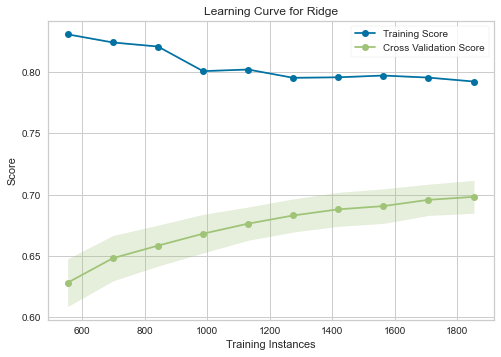

In [ ]:
plot_model(modelo_final, plot = 'learning')

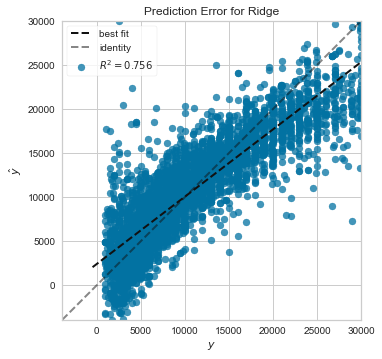

In [ ]:
plot_model(modelo_final, plot = 'error')

##Guardado del modelo

In [ ]:
save_model(modelo_final,r'C:\Users\yesner\Desktop\Used_car')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['model',
                                                             'cylinders',
                                                             'title_status',
                                                             'transmission',
                                                             'drive', 'size',
                                                             'type',
                                                             'paint_color',
                                                             'state'],
                                       display_types=False,
                                       features_todrop=['nummodel',
                                                        'numcylinders',
                                                        'numtitle_status',
                                                        'numtransmission',
       

## **Conclusiones**

1. Se base de datos utilizada demando la depuracion de varios columnas y sus valores nulos fueron completados con el metodo *'ffill'*, de valores cercanos.
2. Se decidio trabajar con el modulo Pycaret, para hacer mas agil la definicion de los modelos a utilizar.
3. Los modelos recomendados para la prediccion de los valores de los vehiculos usados fueron los siguientes: Extra Trees Regressor, Random Forest y Gradient Boosting.
4. Dichos modelos recomendados presentan los valores mas altos de ejecucion (TT - seg), en referencia al resto de los analizados con Pycaret: 148.4, 299.9 y 289.3 respectivamente.
5. Se determino usar el modelo *'et'* para la regresion ya que su valor R^2 era el mas alto (0.8).
6. El modelo elegido ('et') pudo aprender lo suficiente para poder hacer una prediccion del precio de acuerdo al modelo, fabricante, años, odometro y cilindraje de los autos.
7. En la ejecucion de los modelos se pudo determinar que Google Colab demoraba aproximadamente 4 horas, y otros 15 minutos en optimizarlo. Por ello decidimos trabajar en Jupyter Notebook, donde el tiempo de ejecucion se redujo a 1 hora.

